<a href="https://colab.research.google.com/github/lukablaskovic/music-classification-cnn/blob/main/nmdu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## GTZAN Dataset
- 10 classes representing music genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock)

[Available here](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

In [ ]:
import os
import librosa
from PIL import Image

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load audio data
audio_data = {}
for genre in genres:
    audio_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}')
    audio_data[genre] = [librosa.load(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}/{file}', sr=None)[0] for file in audio_files]


## Simple audio waveform visualization

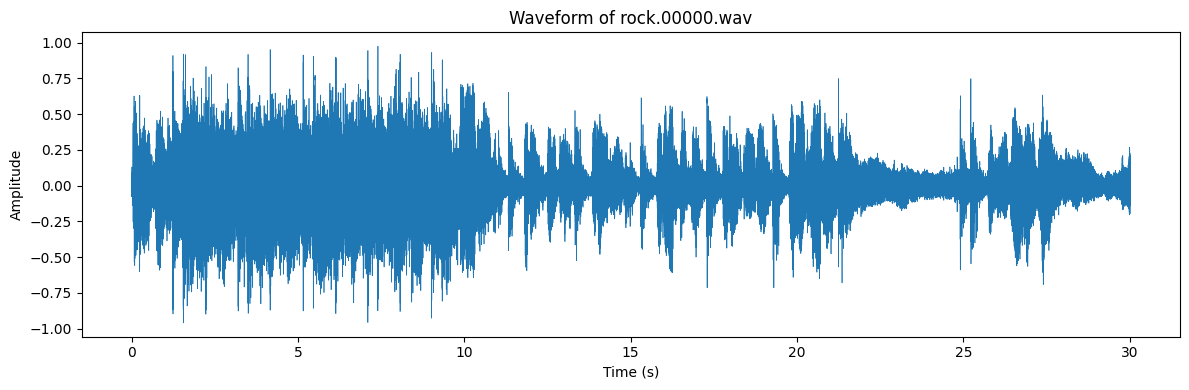

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

AUDIO_FILE = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/rock/rock.00000.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

# Generate time values for each sample
times = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(12, 4))
plt.plot(times, samples, lw=0.5)
plt.title(f'Waveform of rock.00000.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [ ]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (661794,) Sample rate  22050 Data type <class 'numpy.ndarray'>
[ 0.00695801  0.02487183  0.03720093  0.0461731   0.07073975  0.0847168
  0.08685303  0.10891724  0.12097168  0.11602783  0.12515259  0.12878418
  0.11740112  0.08349609  0.05166626  0.04724121  0.02050781 -0.00527954
  0.01361084  0.01818848]


## Different Spectrograms

### Spectrogram visualization #1


<ipython-input-6-b92cb45734fc>:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spectrogram,  x_axis='time', y_axis='hz')


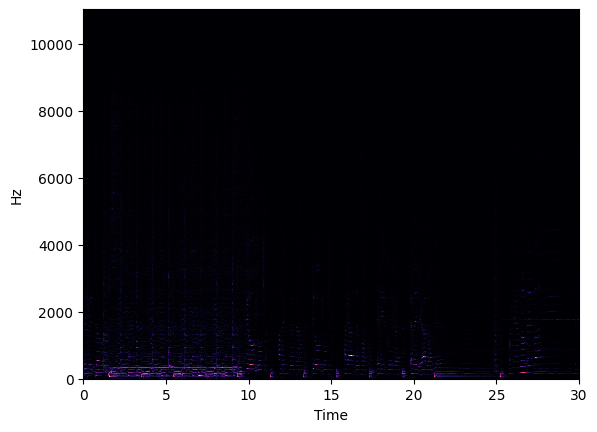

In [ ]:
# The simplest example - it plots Frequency (y-axis) vs Time (x-axis)
spectrogram = librosa.stft(samples)
librosa.display.specshow(spectrogram,  x_axis='time', y_axis='hz')

### Spectrogram visualization #2
But with Mel Scale in place of Frequency, for y-axis

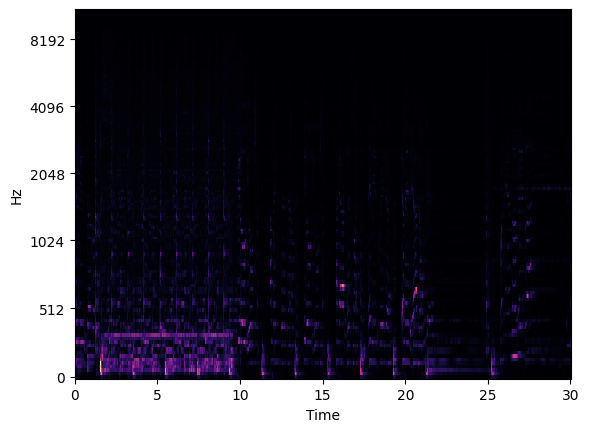

In [ ]:
spectrogram_mag, _ = librosa.magphase(spectrogram)
mel_scale_spectrogram = librosa.feature.melspectrogram(S=spectrogram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_spectrogram,  x_axis='time', y_axis='mel')

In [ ]:
print(type(mel_scale_spectrogram), mel_scale_spectrogram.shape)

<class 'numpy.ndarray'> (128, 1293)


### Spectrogram visualization #3
But with Decibel scale in place of Amplitude, for x-axis

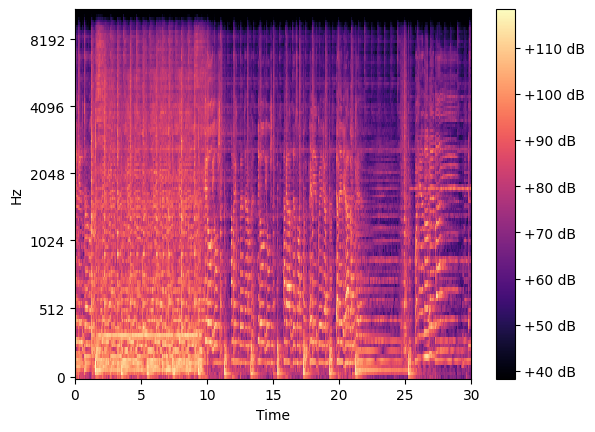

In [ ]:
mel_scale_spectrogram = librosa.amplitude_to_db(mel_scale_spectrogram, ref=np.min)
librosa.display.specshow(mel_scale_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

### MEL and STFT Spectrograms

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

def create_spectrogram(audio, sr, kind='mel', save_path=None):
    plt.figure(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
    elif kind == 'stft':
        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='linear', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title('STFT Spectrogram')
    else:
        raise ValueError("Invalid spectrogram kind. Choose 'mel' or 'stft'.")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

# without labels - image only
def save_spectrogram(audio, sr, kind='mel', save_path=None):
    fig, ax = plt.subplots(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
    ax.axis('off')

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, fmax=8000, ax=ax)
    elif kind == 'stft':
        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, ax=ax)
    else:
        raise ValueError("Invalid spectrogram kind. Choose 'mel' or 'stft'.")

    # Remove white space and save
    fig.tight_layout(pad=0)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close(fig)

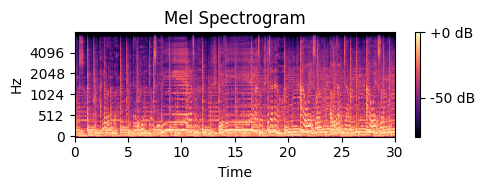

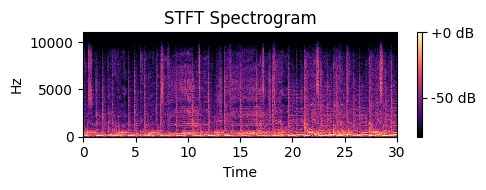

In [ ]:
clip = audio_data["rock"][0]
sr = 22050  # Default sampling rate for librosa

create_spectrogram(clip, sr, kind='mel')
create_spectrogram(clip, sr, kind='stft')

### Generating our own Spectrograms

- generating only mel spectrograms for now, stft is commented-out

In [ ]:
import os
import gc
DEFAULT_SAMPLE_RATE = 22050

# Generate and save spectrograms using the provided function
for genre, clips in audio_data.items():
    # Ensure directories exist
    os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}', exist_ok=True)

    #os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/stft_spectrograms_raw/{genre}', exist_ok=True)

    for idx, clip in enumerate(clips):
        mel_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}/{genre}.{idx}.png'

        #stft_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/stft_spectrograms_raw/{genre}/{genre}.{idx}.png'

        if os.path.exists(mel_save_path): # and os.path.exists(stft_save_path):
            continue

        save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='mel', save_path=mel_save_path)
        #save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='stft', save_path=stft_save_path)
        print(f'{genre}.{idx}.png - created')

        gc.collect()

In [ ]:
import numpy as np
from PIL import Image

spectrogram_image =  np.array(Image.open("/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/blues/blues.0.png"))

min_value = spectrogram_image.min()
max_value = spectrogram_image.max()
shape = spectrogram_image.shape

min_value, max_value, shape # We can use Min-Max Scaling normalization and just divide by 255

(0, 255, (200, 500, 4))

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

for genre in genres:
    genre_folder = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}'
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256)) # increased from 128x128, got around 6% better accuracy
        X.append(img_to_array(image))
        y.append(genres.index(genre))

X = np.array(X) / 255.0  # Normalizing data using Min-Max Scaling as our spectrogram is standard RGB image
y = np.array(y)


# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)



X_train.shape (700, 256, 256, 3)
X_test.shape (300, 256, 256, 3)
y_train.shape (700,)
y_test.shape (300,)


# Model #0 - No training

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

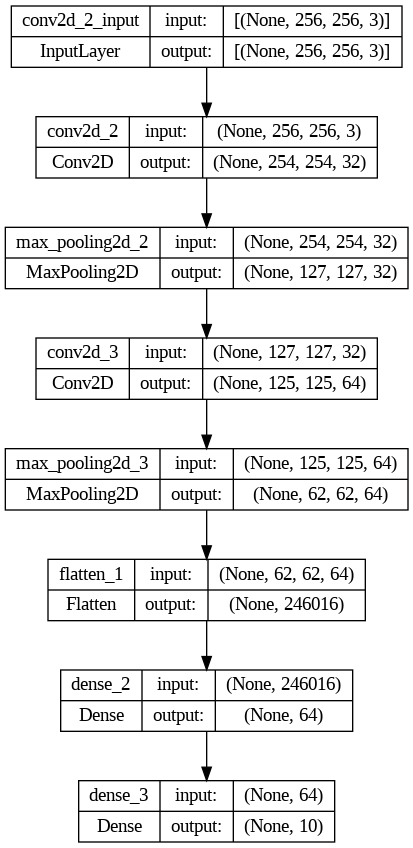

In [8]:
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model


def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model(X_train[0].shape)

model.summary()

plot_model(model, to_file='model0_plot.png', show_shapes=True, show_layer_names=True)



In [ ]:
model = create_model(input_shape=X_train[0].shape)


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

initial_loss, initial_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Initial loss: {initial_loss:.4f}")
print(f"Initial accuracy: {initial_accuracy:.4f}")

Initial loss: 2.3063
Initial accuracy: 0.1033


# Model #1
- a good starting point
- 2 convolutional layers, one with 32 and other with 64 filters of size 3x3
- ReLU activation functions on conv layers
- 2 pooling layers for reducing the spatial dimensions
- flatten layer to map 2d feature maps into 1d vector
- fully-connected layer of 64 neurons
- **output layer** - 10 neurons, corresponding to 10 genres, softmax because of multi-class task as it outputs a probability distribution over the classes
_________________________________
- Adam optimizer
- sparse categorical crossentropy loss
- evaluation metric: accuracy

In [ ]:
BATCH_SIZE=32

def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model1.h5')


Epoch 1/10
22/22 [==============================] - 2s 50ms/step - loss: 5.1008 - accuracy: 0.1043 - val_loss: 2.1989 - val_accuracy: 0.1833
Epoch 2/10
22/22 [==============================] - 0s 20ms/step - loss: 1.9004 - accuracy: 0.3186 - val_loss: 1.8777 - val_accuracy: 0.3167
Epoch 3/10
22/22 [==============================] - 0s 20ms/step - loss: 1.3872 - accuracy: 0.5286 - val_loss: 1.6079 - val_accuracy: 0.4200
Epoch 4/10
22/22 [==============================] - 0s 20ms/step - loss: 1.1168 - accuracy: 0.6086 - val_loss: 1.5997 - val_accuracy: 0.4167
Epoch 5/10
22/22 [==============================] - 0s 20ms/step - loss: 0.8387 - accuracy: 0.7171 - val_loss: 1.7287 - val_accuracy: 0.4333
Epoch 6/10
22/22 [==============================] - 0s 20ms/step - loss: 0.6162 - accuracy: 0.8057 - val_loss: 1.6230 - val_accuracy: 0.4433
Epoch 7/10
22/22 [==============================] - 0s 20ms/step - loss: 0.3717 - accuracy: 0.8871 - val_loss: 1.6717 - val_accuracy: 0.4767
Epoch 8/10
22

In [ ]:
def predict_genre(model, image):
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_genre = genres[np.argmax(prediction)]
    return predicted_genre


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


10/10 [==============================] - 0s 10ms/step - loss: 1.3967 - accuracy: 0.5767
Training Accuracy: 99.86%
Test Accuracy: 57.67%


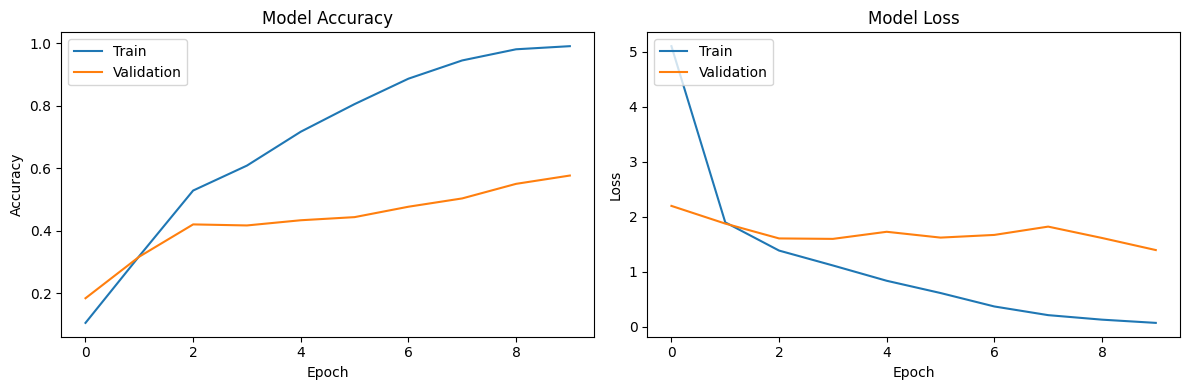

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 1

- 1000 mel spectrogram images
- 70% training, 30% test
- 500 x 200 image size, scaled down to 256x256 when imported in the model
- no data augmentation
- data normalized using Min-Max Scaling
- simple cnn architecture
- Adam optimizer
- around 58% - 62% test accuracy, but overfitting!

**Improvement**: first I generated (1000 x 400) spectrograms and then scaled them to 128x128 for training. By doing that, the images lost a lot of quality. Had around 52% accuracy.


### **Accuracy**:
- training gets close to 100%
- test plateau

### **Loss**
- training gets close to 0
- test plateu then increases

- clear overfitting!

# Data Augmentation - Raw audio
- **Time Shifting** - shifts the audio waveform to the left or the right by a random amount (won't be using cause it's not good to do it on music, only good for random sounds like dogs barking, cars, environmental sounds...) ❌
- **Pitch Scaling** - randomly modify the frequency of parts of the sound without altering its duration (move the melody up or down a couple of semi tones, not affecting the speed) ✅
- **Time Stretching** - this alters the speed of the audio clip without changing its pitch (useful for music) ✅
- Add Noise - add some random noise to the sound

## Audio Augmentation Functions
- time streching
- pitch scaling

In [ ]:
import soundfile as sf
import os
import librosa

def augment_and_save_audio(base_dir, save_dir, stretch_factor, n_steps):

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

    for genre in genres:
        # Make genre directory in save_dir if it doesn't exist
        genre_save_dir = os.path.join(save_dir, genre)
        if not os.path.exists(genre_save_dir):
            os.makedirs(genre_save_dir)

        # List audio files in the genre directory
        genre_dir = os.path.join(base_dir, genre)
        audio_files = os.listdir(genre_dir)

        for file in audio_files:
            file_path = os.path.join(genre_dir, file)

            y, sr = librosa.load(file_path, sr=None)

            # Time stretch and pitch shift
            # The following does the augmentation, takes time to compute...
            y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)

            y_shifted = librosa.effects.pitch_shift(y_stretched, sr=sr, n_steps=n_steps)

            save_path = os.path.join(genre_save_dir, f"aug_{file}")
            sf.write(save_path, y_shifted, sr)


base_dir = "/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original"
save_dir = "/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation"
stretch_factor = 0.9
n_steps = 2
augment_and_save_audio(base_dir, save_dir, stretch_factor, n_steps)


## Spectrograms from augmented raw audio data

In [ ]:
import os
import gc
DEFAULT_SAMPLE_RATE = 22050

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load audio data
audio_augmented_data = {}

for genre in genres:
    audio_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation/{genre}')
    audio_augmented_data[genre] = [librosa.load(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation/{genre}/{file}', sr=None)[0] for file in audio_files]

# Generate and save spectrograms using the provided function
for genre, clips in audio_augmented_data.items():
    # Ensure directories exist
    os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation/{genre}', exist_ok=True)

    for idx, clip in enumerate(clips):
        mel_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation/{genre}/{genre}.{idx}.png'

        if os.path.exists(mel_save_path):
            continue

        save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='mel', save_path=mel_save_path)
        print(f'{genre}.{idx}.png - created')

        gc.collect()

pop.14.png - created
pop.15.png - created
pop.16.png - created
pop.17.png - created
pop.18.png - created
pop.19.png - created
pop.20.png - created
pop.21.png - created
pop.22.png - created
pop.23.png - created
pop.24.png - created
pop.25.png - created
pop.26.png - created
pop.27.png - created
pop.28.png - created
pop.29.png - created
pop.30.png - created
pop.31.png - created
pop.32.png - created
pop.33.png - created
pop.34.png - created
pop.35.png - created
pop.36.png - created
pop.37.png - created
pop.38.png - created
pop.39.png - created
pop.40.png - created
pop.41.png - created
pop.42.png - created
pop.43.png - created
pop.44.png - created
pop.45.png - created
pop.46.png - created
pop.47.png - created
pop.48.png - created
pop.49.png - created
pop.50.png - created
pop.51.png - created
pop.52.png - created
pop.53.png - created
pop.54.png - created
pop.55.png - created
pop.56.png - created
pop.57.png - created
pop.58.png - created
pop.59.png - created
pop.60.png - created
pop.61.png - 

# Data Augmentation - Spectrograms
The normal transforms we would use for an image don't apply to spectrograms

SpecAugment:
- Time Warping - stretching or squeezing of the spectrogram.
- Frequency Masking - randomly mask out a range of consecutive frequencies by adding horizontal bars on the spectrogram. ✅

## Spectrogram Augmentation Functions

### Frequency masking

In [ ]:
def frequency_masking(spectrogram, F=30, num_masks=1, replace_with_zero=True):
    masked_spec = np.copy(spectrogram)
    num_channels, num_frames = masked_spec.shape

    for i in range(num_masks):
        f = np.random.uniform(low=0.0, high=F)
        f = int(f)
        f0 = np.random.uniform(low=0.0, high=num_channels - f)
        f0 = int(f0)

        # Determine the value to replace the mask with
        if replace_with_zero:
            masked_value = 0
        else:
            masked_value = masked_spec.mean()

        for j in range(f0, f0 + f):
            if j < num_channels:
                masked_spec[j, :] = masked_value

    return masked_spec

def frequency_masking_rgb(image, F=30, num_masks=1, replace_with_zero=True):
    masked_image = np.copy(image)

    # Apply frequency masking to each channel
    for channel in range(image.shape[2]):
        masked_image[:,:,channel] = frequency_masking(masked_image[:,:,channel], F=F, num_masks=num_masks, replace_with_zero=replace_with_zero)

    return masked_image


### Time masking

In [ ]:
def time_masking_rgb(spectrogram, T=40, num_masks=1, replace_with_zero=True):

    masked_spec = np.copy(spectrogram)
    num_channels, num_frames, _ = masked_spec.shape

    for i in range(num_masks):
        t = np.random.uniform(low=0.0, high=T)
        t = int(t)
        t0 = np.random.uniform(low=0.0, high=num_frames - t)
        t0 = int(t0)

        if replace_with_zero:
            masked_value = 0
        else:
            masked_value = masked_spec.mean(axis=(0,1))

        for j in range(t0, t0 + t):
            if j < num_frames:
                masked_spec[:, j, :] = masked_value

    return masked_spec


## Loading both data and applying SpecAugment techniques

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

# Load original data spectrograms without applying any augmentation
folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)
        image_array = image_array / 255.0 # normalization

        X.append(image_array)
        y.append(genres.index(genre))

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply frequency mask only on the training data
X_train_frequency_masked = np.array([frequency_masking_rgb(x) for x in X_train])

#############################################################################################################

# Load augmented audio data spectrograms
X_aug = []
y_aug = []

folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)

        image_array = image_array / 255.0 # normalization

        X_aug.append(image_array)
        y_aug.append(genres.index(genre))

# Append augmented data to the training set
X_train = np.concatenate((X_train_frequency_masked,  X_aug), axis=0)
y_train = np.concatenate((y_train, y_aug), axis=0)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)


X_train.shape (1700, 256, 256, 3)
X_test.shape (300, 256, 256, 3)
y_train.shape (1700,)
y_test.shape (300,)


### SpecAugment results #1
- frequency masking applied
- horizontal bars can be seen on spectrograms

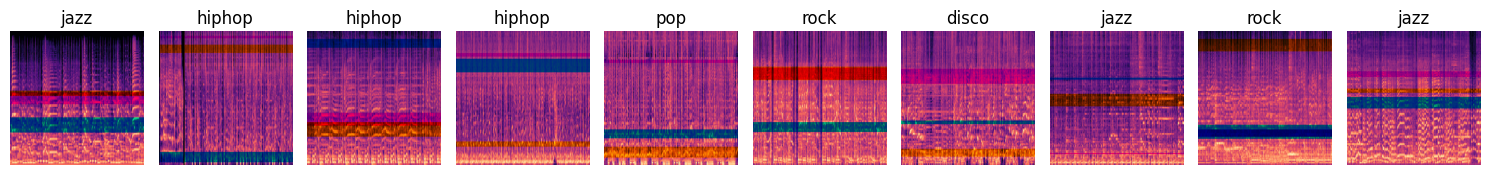

In [ ]:
import matplotlib.pyplot as plt

def visualize_images(images, labels, genres):
    n = len(images)
    plt.figure(figsize=(15, 5))

    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i])
        plt.title(genres[labels[i]])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

sample_images = X_train[:10]
sample_labels = y_train[:10]

visualize_images(sample_images, sample_labels, genres)


# Model #2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model(X_train[0].shape)


In [ ]:
BATCH_SIZE=32
EPOCHS = 10
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model2.h5')


Epoch 1/10
54/54 [==============================] - 3s 26ms/step - loss: 3.1188 - accuracy: 0.1735 - val_loss: 2.1241 - val_accuracy: 0.2233
Epoch 2/10
54/54 [==============================] - 1s 17ms/step - loss: 1.9292 - accuracy: 0.3376 - val_loss: 1.7982 - val_accuracy: 0.3533
Epoch 3/10
54/54 [==============================] - 1s 17ms/step - loss: 1.3956 - accuracy: 0.5235 - val_loss: 1.3297 - val_accuracy: 0.5267
Epoch 4/10
54/54 [==============================] - 1s 17ms/step - loss: 0.9779 - accuracy: 0.6535 - val_loss: 1.2237 - val_accuracy: 0.5533
Epoch 5/10
54/54 [==============================] - 1s 16ms/step - loss: 0.6463 - accuracy: 0.7841 - val_loss: 0.9779 - val_accuracy: 0.6200
Epoch 6/10
54/54 [==============================] - 1s 17ms/step - loss: 0.3657 - accuracy: 0.8888 - val_loss: 0.9278 - val_accuracy: 0.6767
Epoch 7/10
54/54 [==============================] - 1s 17ms/step - loss: 0.3011 - accuracy: 0.9100 - val_loss: 0.6121 - val_accuracy: 0.7833
Epoch 8/10
54

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


10/10 [==============================] - 0s 9ms/step - loss: 0.4799 - accuracy: 0.8333
Training Accuracy: 99.94%
Test Accuracy: 83.33%


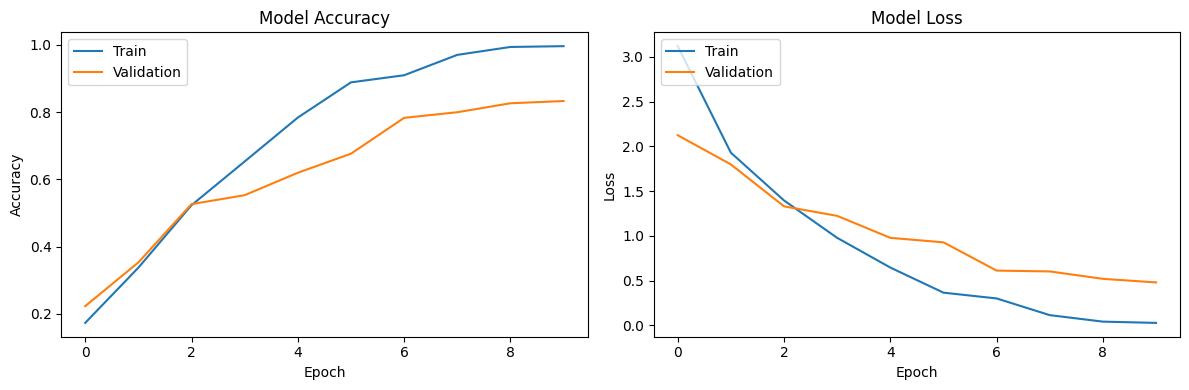

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 2

- applied data augmentation techniques
- 2000 mel spectrogram images: 1000 generated from raw data augmentation + 1000 generated from augmenting spectrograms of the original data
- 80 % training and 20 % from original data, non additioan augmented, so 200 training data
- around 75-85% accuracy, much better but still clear **overfitting**

# Testing

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2
DEFAULT_SAMPLE_RATE = 22050

def audio_to_mel_spectrogram(audio, target_size=(256, 256)):

  fig, ax = plt.subplots(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
  ax.axis("off")

  S = librosa.feature.melspectrogram(y=audio, sr=DEFAULT_SAMPLE_RATE)
  S_dB = librosa.power_to_db(S, ref= np.max)
  librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr = DEFAULT_SAMPLE_RATE, fmax=8000, ax=ax)

  fig.tight_layout(pad=0)

  # Save the spectrogram as a temporary image
  save_path = "temp_spectrogram.png"
  fig.savefig(save_path, bbox_inches="tight", pad_inches=0, transparent= True)

  # Load and resize the image
  image = load_img(save_path, target_size=target_size)
  return img_to_array(image) / 255.0


In [ ]:
from tensorflow.keras.models import load_model

model_path = "model5.h5"
model = load_model(model_path)


In [ ]:
def predict_genre(model, image_array, genres):
    prediction = model.predict(np.expand_dims(image_array, axis=0))[0]
    return dict(zip(genres, prediction))


In [ ]:
from IPython.display import Audio

audio_file_path = '/content/drive/My Drive/NMDU/Projekt/data/predict/epic.wav'
Audio(audio_file_path)


1/1 [==============================] - 0s 21ms/step
metal: 0.40
hiphop: 0.21
blues: 0.14
rock: 0.09
reggae: 0.04
jazz: 0.04
country: 0.03
disco: 0.02
pop: 0.02
classical: 0.02


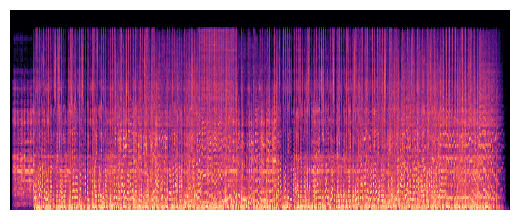

In [ ]:
audio_file_path = '/content/drive/My Drive/NMDU/Projekt/data/predict/cake.mp3'

audio = librosa.load(audio_file_path, sr=None)[0]

image_array = audio_to_mel_spectrogram(audio)
distribution  = predict_genre(model, image_array, genres)

sorted_distribution = sorted(distribution.items(), key=lambda item: item[1], reverse=True)

for genre, probability in sorted_distribution:
    print(f"{genre}: {probability:.2f}")

# Generating even more data

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

# Load original data spectrograms without applying any augmentation
folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)
        image_array = image_array / 255.0 # normalization

        X.append(image_array)
        y.append(genres.index(genre))

X = np.array(X)
y = np.array(y)

# Split the raw data first
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80-20 split

# Apply frequency mask on the raw training data
X_train_frequency_masked = np.array([frequency_masking_rgb(x) for x in X_train_raw])

# Apply time mask on the raw training data
X_train_time_masked = np.array([time_masking_rgb(x) for x in X_train_raw])

X_aug = []
y_aug = []

folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)

        image_array = image_array / 255.0 # normalization

        X_aug.append(image_array)
        y_aug.append(genres.index(genre))

# Append augmented data to the training set
X_train_combined = np.concatenate((X_train_raw, X_train_frequency_masked, X_train_time_masked, X_aug), axis=0)
y_train_combined = np.concatenate((y_train_raw, y_train_raw, y_train_raw, y_aug), axis=0)

X_train = X_train_combined
y_train = y_train_combined

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)


X_train.shape (3400, 256, 256, 3)
X_test.shape (200, 256, 256, 3)
y_train.shape (3400,)
y_test.shape (200,)


## SpecAugment results #2

- time masking



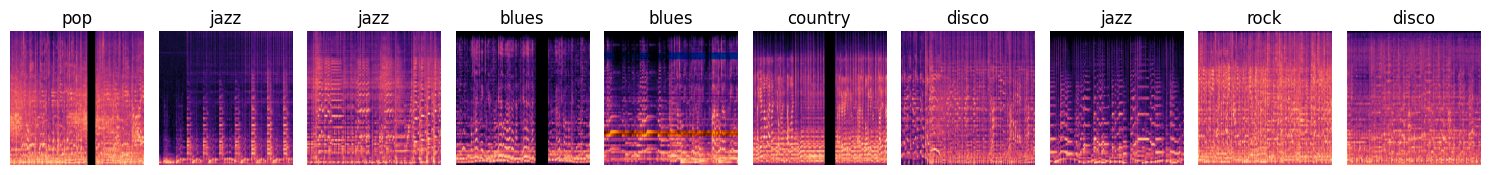

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_random_images(images, labels, genres, n=10):
    total_images = len(images)
    random_indices = np.random.choice(total_images, size=n, replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.title(genres[labels[idx]])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_random_images(X_train, y_train, genres)


# Model #3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_shape, learning_rate=0.001):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))  # New CNN layer
    model.add(MaxPooling2D((2, 2)))  # New Pooling layer

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



In [ ]:
model = create_model(X_train[0].shape, learning_rate=0.001)

BATCH_SIZE=32
EPOCHS = 10
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model3.h5')


Epoch 1/10
107/107 [==============================] - 4s 20ms/step - loss: 2.2000 - accuracy: 0.2159 - val_loss: 1.9844 - val_accuracy: 0.2850
Epoch 2/10
107/107 [==============================] - 2s 16ms/step - loss: 1.8680 - accuracy: 0.3244 - val_loss: 1.6028 - val_accuracy: 0.3850
Epoch 3/10
107/107 [==============================] - 2s 17ms/step - loss: 1.6983 - accuracy: 0.3762 - val_loss: 1.5102 - val_accuracy: 0.4600
Epoch 4/10
107/107 [==============================] - 2s 17ms/step - loss: 1.5302 - accuracy: 0.4441 - val_loss: 1.4104 - val_accuracy: 0.4750
Epoch 5/10
107/107 [==============================] - 2s 17ms/step - loss: 1.4255 - accuracy: 0.4809 - val_loss: 1.5003 - val_accuracy: 0.4600
Epoch 6/10
107/107 [==============================] - 2s 17ms/step - loss: 1.2549 - accuracy: 0.5300 - val_loss: 1.2056 - val_accuracy: 0.5350
Epoch 7/10
107/107 [==============================] - 2s 16ms/step - loss: 1.1123 - accuracy: 0.5812 - val_loss: 1.4184 - val_accuracy: 0.5000

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


7/7 [==============================] - 0s 10ms/step - loss: 0.7918 - accuracy: 0.7000
Training Accuracy: 93.12%
Test Accuracy: 70.00%


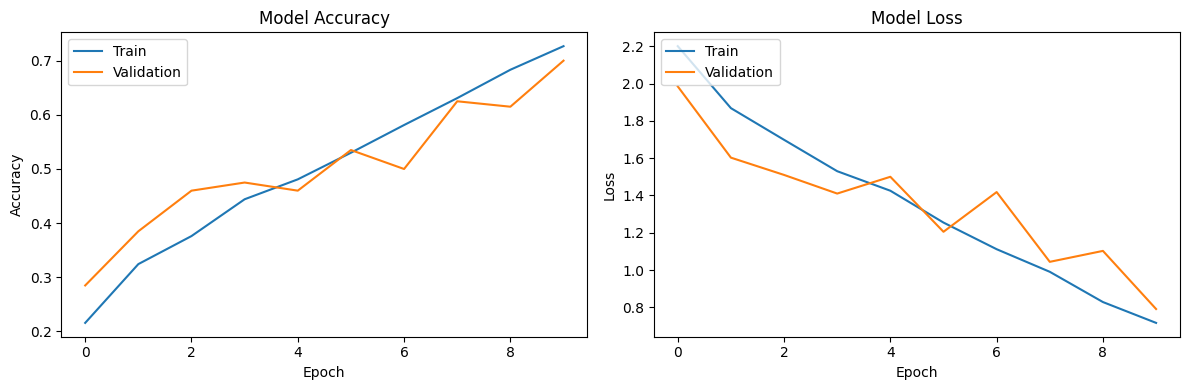

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 3

- added 1 more convolutional layer
- tried several learning rate, the default one of 0.001 seems to work
- added dropout layer, tested using several values (0.2, 0.4, 0.5, 0.75). 0.4 and 0.5 give the best results

- applied 1 more spectrogram augmentation technique -> time masking
- 3400 mel spectrogram images: 1000 generated from raw data augmentation + 1600 generated from augmented spectrogram (frequency mask + time mask) - 200 for validation

- tried training on larger number of epochs, validation loss starts to stagnate after 10th epoch
- around 75 accuracy, less overfitting!


# Model #4

- added L2 regularization and Batch Normalization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


def create_model(input_shape, learning_rate=0.001):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(512, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())

    model.add(Dropout(0.8))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model = create_model(X_train[0].shape, learning_rate=0.0001)

BATCH_SIZE=32
EPOCHS = 20
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model4.h5')


Epoch 1/20
107/107 [==============================] - 7s 30ms/step - loss: 5.6700 - accuracy: 0.2618 - val_loss: 7.8443 - val_accuracy: 0.1250
Epoch 2/20
107/107 [==============================] - 3s 27ms/step - loss: 4.7277 - accuracy: 0.3894 - val_loss: 10.7369 - val_accuracy: 0.1250
Epoch 3/20
107/107 [==============================] - 3s 26ms/step - loss: 3.9596 - accuracy: 0.5150 - val_loss: 9.1552 - val_accuracy: 0.1250
Epoch 4/20
107/107 [==============================] - 3s 27ms/step - loss: 3.4506 - accuracy: 0.6253 - val_loss: 6.3160 - val_accuracy: 0.1400
Epoch 5/20
107/107 [==============================] - 3s 27ms/step - loss: 3.0018 - accuracy: 0.7121 - val_loss: 4.9922 - val_accuracy: 0.2150
Epoch 6/20
107/107 [==============================] - 3s 26ms/step - loss: 2.6669 - accuracy: 0.7915 - val_loss: 3.6344 - val_accuracy: 0.4900
Epoch 7/20
107/107 [==============================] - 3s 26ms/step - loss: 2.4507 - accuracy: 0.8376 - val_loss: 3.2334 - val_accuracy: 0.520

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


7/7 [==============================] - 0s 11ms/step - loss: 1.1716 - accuracy: 0.8800
Training Accuracy: 99.97%
Test Accuracy: 88.00%


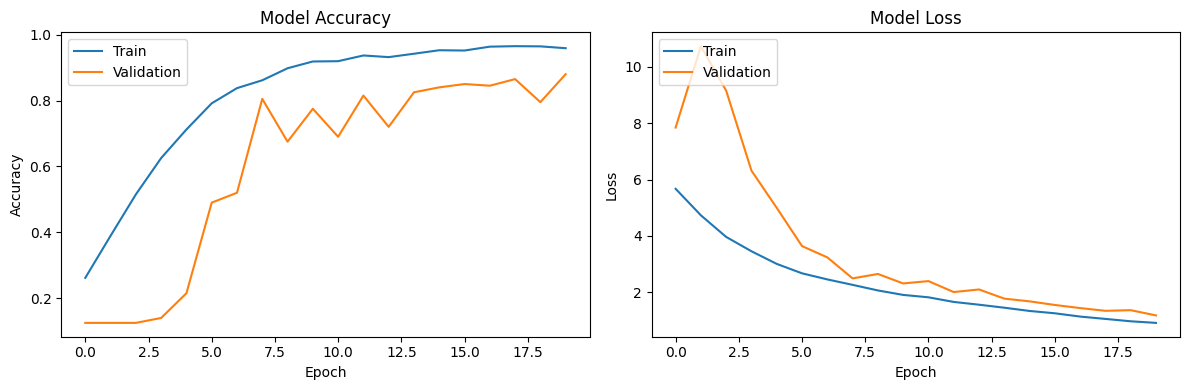

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 4

- added 1 more convolutional layer
- added batch normalization layers after convolutional layers and before the activation functions
- got much better results, might be too much dropout regularization now
- reducing overfitting by a lot, but it still overfits :)

# Model #5

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_callback = LearningRateScheduler(scheduler)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


def create_model(input_shape, learning_rate=0.001):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(512, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(1024, (3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, kernel_regularizer=l2(0.04)))
    model.add(BatchNormalization())

    model.add(Dropout(0.85))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model = create_model(X_train[0].shape, learning_rate=0.0001)

BATCH_SIZE=32
EPOCHS = 36
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_callback, early_stopping])

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model5.h5')

Epoch 1/36
107/107 [==============================] - 8s 31ms/step - loss: 8.4412 - accuracy: 0.2259 - val_loss: 10.4691 - val_accuracy: 0.1250 - lr: 1.0000e-04
Epoch 2/36
107/107 [==============================] - 3s 27ms/step - loss: 7.3406 - accuracy: 0.3085 - val_loss: 10.8146 - val_accuracy: 0.1250 - lr: 1.0000e-04
Epoch 3/36
107/107 [==============================] - 3s 28ms/step - loss: 6.4779 - accuracy: 0.3950 - val_loss: 9.5458 - val_accuracy: 0.1250 - lr: 1.0000e-04
Epoch 4/36
107/107 [==============================] - 3s 28ms/step - loss: 5.7557 - accuracy: 0.4550 - val_loss: 7.6123 - val_accuracy: 0.1600 - lr: 1.0000e-04
Epoch 5/36
107/107 [==============================] - 3s 28ms/step - loss: 5.0497 - accuracy: 0.5459 - val_loss: 5.9711 - val_accuracy: 0.2600 - lr: 1.0000e-04
Epoch 6/36
107/107 [==============================] - 3s 27ms/step - loss: 4.4032 - accuracy: 0.6062 - val_loss: 4.4308 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 7/36
107/107 [==================

In [ ]:
model.summary()

train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_117 (B  (None, 254, 254, 32)      128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_98 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_99 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_118 (B  (None, 125, 125, 64)      256       
 atchNormalization)                                              
                                                     

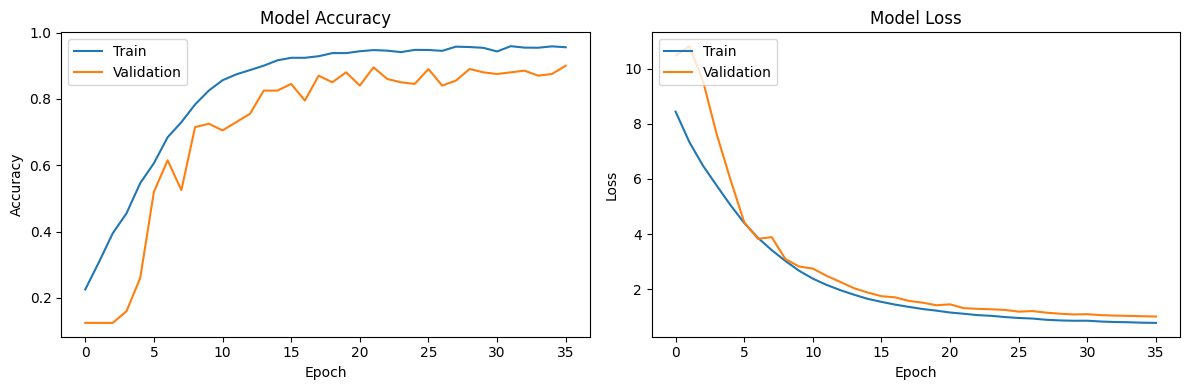

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 5

- added 1 more convolutional layer, 6 in total now
- added LearningRateScheduler
- added EarlyStopping with patience of 5
- incresead training epochs to 36 as the loss keep decreasing
- still slight overfitting, I think more data is required to reduce overfitting

# Transfer learning test

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

def create_transfer_model(input_shape, learning_rate=0.001):
    print(VGG16)
    # VGG16 - 16 layers deep, trained on more than a million images from the ImageNet database (ImageNet. http://www.image-net.org)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model = create_transfer_model(X_train[0].shape, learning_rate=0.0001)

BATCH_SIZE=32
EPOCHS = 32
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_callback, early_stopping])

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model6.h5')

<function VGG16 at 0x7dbb64e1f910>
Epoch 1/32
107/107 [==============================] - 5s 36ms/step - loss: 1.6162 - accuracy: 0.4474 - val_loss: 1.7034 - val_accuracy: 0.4650 - lr: 1.0000e-04
Epoch 2/32
107/107 [==============================] - 3s 32ms/step - loss: 1.0812 - accuracy: 0.6703 - val_loss: 1.2966 - val_accuracy: 0.6100 - lr: 1.0000e-04
Epoch 3/32
107/107 [==============================] - 3s 32ms/step - loss: 0.8891 - accuracy: 0.7624 - val_loss: 0.9888 - val_accuracy: 0.7250 - lr: 1.0000e-04
Epoch 4/32
107/107 [==============================] - 3s 32ms/step - loss: 0.7520 - accuracy: 0.8191 - val_loss: 0.9220 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 5/32
107/107 [==============================] - 3s 32ms/step - loss: 0.6338 - accuracy: 0.8744 - val_loss: 1.4060 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 6/32
107/107 [==============================] - 3s 32ms/step - loss: 0.5553 - accuracy: 0.8994 - val_loss: 0.7831 - val_accuracy: 0.7950 - lr: 1.0000e-04
Epoch

In [ ]:
model.summary()

train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

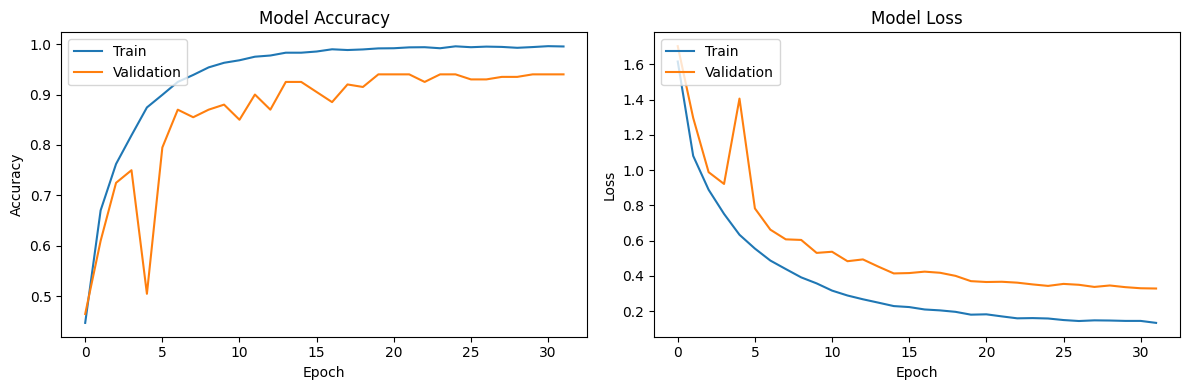

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 6

- created a transfer learning model which utilizes pretrained VGG16 neural network
- reduced loss and slightly increased accuracy in comparison to Model #5
- suprisingly good results as that neural network was trained on imagenet images, while here it is essentialy used for sound classification

- **that will be it!**